# Task 5.2C

In [98]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
cs_attack_df = pd.read_csv('cybersecurity_attacks.csv')

## 1.1 Display the first few rows of the dataset with the column headers to understand its structure.

In [8]:
dataset_head = cs_attack_df.head()

In [10]:
dataset_head

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,NaN,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,NaN,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Alert Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Alert Data,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Alert Data,Firewall


## 1.2 Handle Missing Values (Identify missing values in the dataset and then Apply appropriate methods to handle missing values)

### Understanding the dataset

In [20]:
# rows and columns in the dataset
cs_attack_df.shape

(40000, 25)

In [22]:
#check the number of missing values in each column
cs_attack_df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Alerts/Warnings           20067
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
IDS/IPS Alerts            20050
Log Source                    0
dtype: int64

In [58]:
# if we drop all the missing data, a large portion of the dataset will be removed

In [24]:
cs_attack_df.dropna().shape

(1237, 25)

In [60]:
# there's no empty rows

In [26]:
cs_attack_df.dropna(how='all').shape

(40000, 25)

In [28]:
#if there's rows that has all the missing value having NaN at the same time
cs_attack_df.dropna(subset = ['Malware Indicators','Alerts/Warnings', 'Proxy Information','Firewall Logs','IDS/IPS Alerts'], how ='all').shape

(38769, 25)

### Checking the different values in each columns that has missing data

In [31]:
cs_attack_df['Malware Indicators'].value_counts(dropna=False)

Malware Indicators
IoC Detected    20000
NaN             20000
Name: count, dtype: int64

In [33]:
cs_attack_df['Alerts/Warnings'].value_counts(dropna=False)

Alerts/Warnings
NaN                20067
Alert Triggered    19933
Name: count, dtype: int64

In [35]:
cs_attack_df['Proxy Information'].value_counts(dropna=False)

Proxy Information
NaN                19851
39.123.165.122         2
134.217.134.7          1
211.195.173.251        1
211.232.254.112        1
                   ...  
78.192.52.63           1
157.191.153.187        1
205.183.87.116         1
85.48.37.84            1
112.169.115.139        1
Name: count, Length: 20149, dtype: int64

In [37]:
cs_attack_df['Firewall Logs'].value_counts(dropna=False)

Firewall Logs
Log Data    20039
NaN         19961
Name: count, dtype: int64

In [39]:
cs_attack_df['IDS/IPS Alerts'].value_counts(dropna=False)

IDS/IPS Alerts
NaN           20050
Alert Data    19950
Name: count, dtype: int64

In [62]:
#missing value % (mvp)
mvp = (cs_attack_df.isnull().sum()/len(cs_attack_df))*100
mvp


Timestamp                  0.0000
Source IP Address          0.0000
Destination IP Address     0.0000
Source Port                0.0000
Destination Port           0.0000
Protocol                   0.0000
Packet Length              0.0000
Packet Type                0.0000
Traffic Type               0.0000
Payload Data               0.0000
Malware Indicators        50.0000
Anomaly Scores             0.0000
Alerts/Warnings           50.1675
Attack Type                0.0000
Attack Signature           0.0000
Action Taken               0.0000
Severity Level             0.0000
User Information           0.0000
Device Information         0.0000
Network Segment            0.0000
Geo-location Data          0.0000
Proxy Information         49.6275
Firewall Logs             49.9025
IDS/IPS Alerts            50.1250
Log Source                 0.0000
dtype: float64

### Handling Missing data

In [65]:
# Missing value columns - 'Malware Indicators','Alerts/Warnings', 'Proxy Information','Firewall Logs','IDS/IPS Alerts'
# Has no visible relationship with each other
# above 50% missing - 'Alerts/Warnings', 'IDS/IPS Alerts'
# 50% - 'Malware Indicators'
# almost 50% - 'Proxy Information','Firewall Logs'

#### Observations related to the dataset
<li>There are 40000 entries and 25 columns in this dataset.</li>
<li>Out of 25 coulmns, 5 columns contain significantly higher number of missing data(50%) - 'Malware Indicators','Alerts/Warnings', 'Proxy Information','Firewall Logs','IDS/IPS Alerts'</li>
<li>Columns like Timestamp, Attack Type, Packet Length, Protocol, and Traffic Type provide useful information for analysis.</li>
<li>Categorical fields such as 'Alerts/Warnings', 'Proxy Information','Firewall Logs' - does not have a natural numerical replacement</li>

#### Plan of action:
* If all the missing values are dropped, a large portion of the dataset will be removed.
* We can remove the columns that has more than 50% missing data.

    ##### why?
    * Columns with too many missing values often doesn't add much to the analysis as it introduce noise, which will lead to unreliable conclusions.
    * Avoids biased imputations - as half of its data is missing, adding any value will introduce significant biase, skewing the results.
    * Improve performance of the model - having too many missing values affects the model's accuracy and performance. (In fact, removing such columns streamlines process.)

* Once the columns more than 50% data is removed, we can fill missing values with a value such as "unknown" for categorical data - common approach when dealing with missing values that represent categories/labels.

    ##### why?
    * Filling with a placeholder like 'unknown' helps preserve data in the dataset, by maintaining the row (which might contain valuable information in other columns).
    * Since there are no natural numerical replacement for categorical data, a placeholder like 'unknown' ensures the dataset remains consistant.
    * Avoids biased data formation - filling with the most occuring value will introduce heavy biasness to the dataset, using a placeholder helps to maintain the integrity of the analysis by marking the missing information, rather replacing it.
    * Helps to have some clarity between the missing values and valid entries.
 
##### This will help us preserve the structure of the dataset and it also ensures that all the datapoints are considered in analysis
  
  

In [361]:
# dropping the columns that has more than 50% missing values
threshold = len(cs_attack_df) * 0.5
cleaned_df = cs_attack_df.dropna(thresh=threshold, axis=1)

In [363]:
cleaned_df.head()

,Timestamp,Source IP Address,Destination IP Address,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Payload Data,...,Attack Signature,Action Taken,Severity Level,User Information,Device Information,Network Segment,Geo-location Data,Proxy Information,Firewall Logs,Log Source
0,2023-05-30 06:33:58,103.216.15.12,84.9.164.252,31225,17616,ICMP,503,Data,HTTP,Qui natus odio asperiores nam. Optio nobis ius...,...,Known Pattern B,Logged,Low,Reyansh Dugal,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment A,"Jamshedpur, Sikkim",150.9.97.135,Log Data,Server
1,2020-08-26 07:08:30,78.199.217.198,66.191.137.154,17245,48166,ICMP,1174,Data,HTTP,Aperiam quos modi officiis veritatis rem. Omni...,...,Known Pattern A,Blocked,Low,Sumer Rana,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Segment B,"Bilaspur, Nagaland",NaN,Log Data,Firewall
2,2022-11-13 08:23:25,63.79.210.48,198.219.82.17,16811,53600,UDP,306,Control,HTTP,Perferendis sapiente vitae soluta. Hic delectu...,...,Known Pattern B,Ignored,Low,Himmat Karpe,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Segment C,"Bokaro, Rajasthan",114.133.48.179,Log Data,Firewall
3,2023-07-02 10:38:46,163.42.196.10,101.228.192.255,20018,32534,UDP,385,Data,HTTP,Totam maxime beatae expedita explicabo porro l...,...,Known Pattern B,Blocked,Medium,Fateh Kibe,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,Segment B,"Jaunpur, Rajasthan",NaN,NaN,Firewall
4,2023-07-16 13:11:07,71.166.185.76,189.243.174.238,6131,26646,TCP,1462,Data,DNS,Odit nesciunt dolorem nisi iste iusto. Animi v...,...,Known Pattern B,Blocked,Low,Dhanush Chad,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,Segment C,"Anantapur, Tripura",149.6.110.119,NaN,Firewall


In [365]:
cleaned_df.isnull().sum()

Timestamp                     0
Source IP Address             0
Destination IP Address        0
Source Port                   0
Destination Port              0
Protocol                      0
Packet Length                 0
Packet Type                   0
Traffic Type                  0
Payload Data                  0
Malware Indicators        20000
Anomaly Scores                0
Attack Type                   0
Attack Signature              0
Action Taken                  0
Severity Level                0
User Information              0
Device Information            0
Network Segment               0
Geo-location Data             0
Proxy Information         19851
Firewall Logs             19961
Log Source                    0
dtype: int64

In [367]:
#handling the remaining missing values by imputing them with a placeholder value 'unknown'
df = cleaned_df.copy()
df.fillna('Unknown', inplace=True)

In [369]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               40000 non-null  object 
 1   Source IP Address       40000 non-null  object 
 2   Destination IP Address  40000 non-null  object 
 3   Source Port             40000 non-null  int64  
 4   Destination Port        40000 non-null  int64  
 5   Protocol                40000 non-null  object 
 6   Packet Length           40000 non-null  int64  
 7   Packet Type             40000 non-null  object 
 8   Traffic Type            40000 non-null  object 
 9   Payload Data            40000 non-null  object 
 10  Malware Indicators      40000 non-null  object 
 11  Anomaly Scores          40000 non-null  float64
 12  Attack Type             40000 non-null  object 
 13  Attack Signature        40000 non-null  object 
 14  Action Taken            40000 non-null

In [371]:
df.isnull().sum()

Timestamp                 0
Source IP Address         0
Destination IP Address    0
Source Port               0
Destination Port          0
Protocol                  0
Packet Length             0
Packet Type               0
Traffic Type              0
Payload Data              0
Malware Indicators        0
Anomaly Scores            0
Attack Type               0
Attack Signature          0
Action Taken              0
Severity Level            0
User Information          0
Device Information        0
Network Segment           0
Geo-location Data         0
Proxy Information         0
Firewall Logs             0
Log Source                0
dtype: int64

## 1.3 When most of the attacks happened (show by month and attack type). Give some insights based on data analysis supported by the visualization.



In [400]:
#converting the 'Timestamp' column to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [402]:
#getting the month from 'Timestamp'
df['Month'] = df['Timestamp'].dt.month

In [404]:
#groupby 'Month' and 'Attack Type' to get the counts
attacks_by_month = df.groupby(['Month', 'Attack Type']).size().unstack()

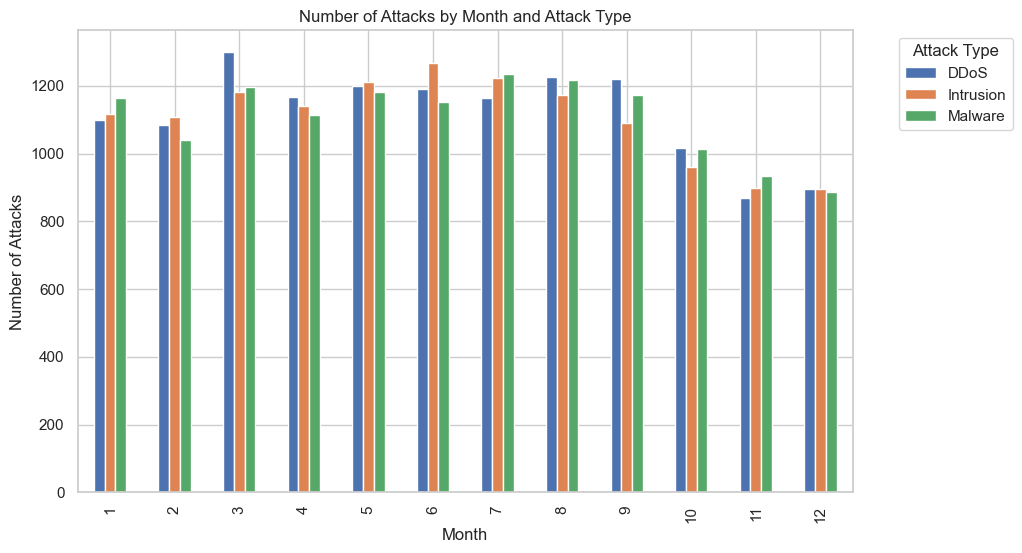

In [406]:
# plotting the data with grouped bars
attacks_by_month.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Number of Attacks by Month and Attack Type')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.legend(title='Attack Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### Insights from the above analysis:

In [377]:
attacks_by_month

Attack Type,DDoS,Intrusion,Malware
Month,,,
1,1099,1116,1163
2,1085,1107,1040
3,1299,1182,1197
4,1166,1140,1115
5,1200,1212,1183
6,1190,1268,1151
7,1163,1224,1236
8,1226,1173,1216
9,1221,1089,1172


In [379]:
#total attacks per month
total_attacks_per_month = attacks_by_month.sum(axis=1)
total_attacks_per_month

Month
1     3378
2     3232
3     3678
4     3421
5     3595
6     3609
7     3623
8     3615
9     3482
10    2989
11    2703
12    2675
dtype: int64

* Highest frequency of attacks across all the types of attacks are seen in the 1st 3 months (Jan-Mar) of the year - High volume of attacks early in the year.
* Highest number of attacks are seen in the month of March with a total of 3678 attacks.
* DDoS attacks shows a peak March with 1299 incidents.
* From April to September, the attacks seem relatively stable: Mid year - stability 
* During the month of June, there's a sudden spike in Intrusion attacks.
* Towards the end of the year, there's a significant decline in incidents.
* Malware attacks - maintain a high number of attacks throughout the year across all months, making it the most persistent attack type.
* Intrusion attacks - can be ranked 2nd.
* DDoS attacks shows the largest fluctuations (Spike in March and gradually dropping towards the end of the year).

##### Defence: Early part of the year should be the most focused due to the high frequency of incidents.

## 1.4 Show the packet length distribution for different attack types.

In [383]:
#calculating the total packet length for each attack type
total_packet_length = df.groupby('Attack Type')['Packet Length'].sum()

In [526]:
colors = {'DDoS': 'lightcoral', 'Intrusion': 'bisque', 'Malware': 'skyblue'}

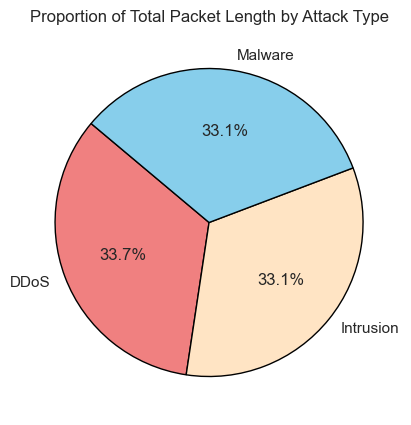

In [398]:
plt.figure(figsize=(5, 5))
plt.pie(total_packet_length, 
        labels=total_packet_length.index, 
        colors=[colors[attack_type] for attack_type in total_packet_length.index], 
        autopct='%1.1f%%', 
        startangle=140, 
        wedgeprops=dict(edgecolor='black'))

plt.title('Proportion of Total Packet Length by Attack Type')
plt.show()

## 2. Provide 5 unique insights that you can obtain based on the cyber data analysis.Provide supportive data and visualization (if any). List and explain them.

1. Time of the day patterns

In [416]:
#extract hour from 'Timestamp'
df['Hour'] = df['Timestamp'].dt.hour

In [418]:
#groupny hour and count the number of attacks
attacks_by_hour = df['Hour'].value_counts().sort_index()

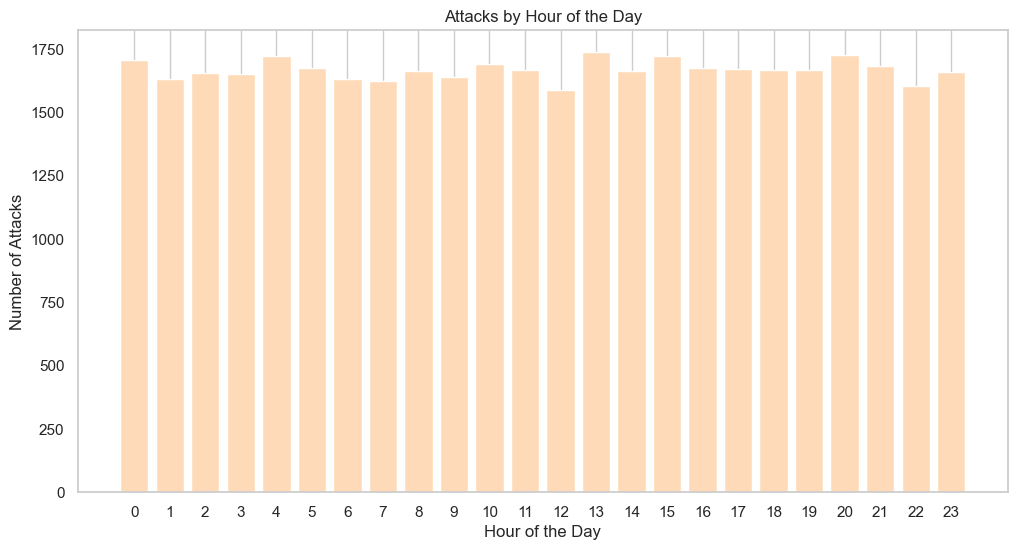

In [420]:
plt.figure(figsize=(12, 6))
plt.bar(attacks_by_hour.index, attacks_by_hour.values, color='peachpuff')

plt.title('Attacks by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Attacks')
plt.xticks(range(24))
plt.grid(axis='y')
plt.show()


* Peak attack hours - highest frequency of attacks occurs around 13:00pm, 20:00pm and 04:00am.
* Frequency of attacks are higher even during the non-business hours.
* There's consistency in attacks during the busy hours and early mornings.
* Lowest attack frequency is observed at 12:00, which suggest that the attacks focus on times with higher system activity.

3. Protocol usage and attack correlation.

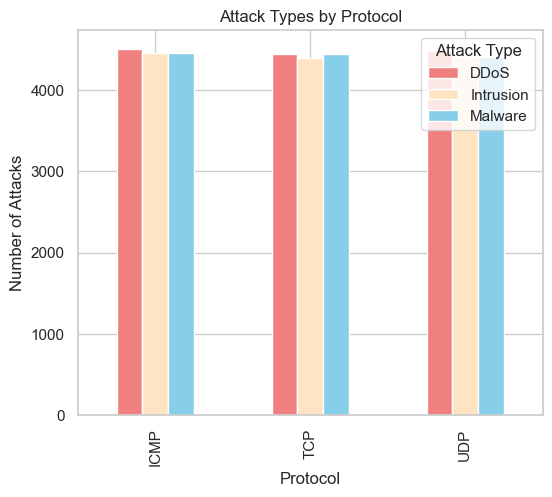

In [534]:
attack_by_protocol = df.groupby(['Protocol', 'Attack Type']).size().unstack()
attack_by_protocol.plot(kind='bar', color=[colors[col] for col in attack_by_protocol.columns],figsize=(6, 5))
plt.title('Attack Types by Protocol')
plt.xlabel('Protocol')
plt.ylabel('Number of Attacks')
plt.show()


In [536]:
attack_by_protocol

Attack Type,DDoS,Intrusion,Malware
Protocol,,,
ICMP,4508,4460,4461
TCP,4438,4397,4437
UDP,4482,4408,4409


* ICMP is the protocol most commonly associated with attacks across all categories.
* TCP is the next common and closely related with DDoS attacks.
* UDP protocol is mostly used with DDos attack and used almost same way with Intrusion and Malware attacks.

4. Distribution of severity level

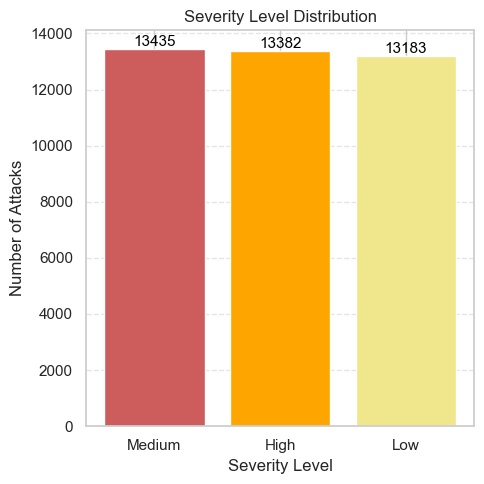

In [571]:
severity_counts = df['Severity Level'].value_counts()

plt.figure(figsize=(5, 5))
bars = plt.bar(severity_counts.index, severity_counts.values, color=['indianred','orange','khaki'])

plt.title('Severity Level Distribution')
plt.xlabel('Severity Level')
plt.ylabel('Number of Attacks')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height - 5, f'{int(height)}', ha='center', va='bottom', color='black', fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [543]:
severity_counts

Severity Level
Medium    13435
High      13382
Low       13183
Name: count, dtype: int64

* Medium severity are nearly as frequent as High severity cases.
* Low severity incidents make up a slightly smaller portion of the attacks.

5. Geo-location and Attack Patterns

In [637]:
#frequency of attacks by Geo-location Data
attack_geo_source = df.groupby('Geo-location Data')['Attack Type'].value_counts().unstack().fillna(0)
attack_geo_source['Total Attacks'] = attack_geo_source.sum(axis=1)
top_geo_sources = attack_geo_source.sort_values(by='Total Attacks', ascending=False).head(10)

In [639]:
attack_geo_source

Attack Type,DDoS,Intrusion,Malware,Total Attacks
Geo-location Data,,,,
"Adoni, Andhra Pradesh",2.0,1.0,1.0,4.0
"Adoni, Arunachal Pradesh",2.0,1.0,1.0,4.0
"Adoni, Assam",2.0,4.0,0.0,6.0
"Adoni, Bihar",2.0,0.0,0.0,2.0
"Adoni, Chhattisgarh",4.0,1.0,3.0,8.0
...,...,...,...,...
"Yamunanagar, Telangana",0.0,1.0,1.0,2.0
"Yamunanagar, Tripura",3.0,1.0,4.0,8.0
"Yamunanagar, Uttar Pradesh",3.0,4.0,0.0,7.0


In [641]:
attack_geo_source['Total Attacks']

Geo-location Data
Adoni, Andhra Pradesh         4.0
Adoni, Arunachal Pradesh      4.0
Adoni, Assam                  6.0
Adoni, Bihar                  2.0
Adoni, Chhattisgarh           8.0
                             ... 
Yamunanagar, Telangana        2.0
Yamunanagar, Tripura          8.0
Yamunanagar, Uttar Pradesh    7.0
Yamunanagar, Uttarakhand      1.0
Yamunanagar, West Bengal      5.0
Name: Total Attacks, Length: 8723, dtype: float64

In [643]:
top_geo_sources

Attack Type,DDoS,Intrusion,Malware,Total Attacks
Geo-location Data,,,,
"Ghaziabad, Meghalaya",4.0,7.0,5.0,16.0
"Kalyan-Dombivli, Jharkhand",6.0,5.0,4.0,15.0
"Ghaziabad, Uttarakhand",3.0,5.0,6.0,14.0
"Ghaziabad, Tripura",4.0,4.0,6.0,14.0
"Motihari, Odisha",5.0,1.0,7.0,13.0
"Aurangabad, Nagaland",4.0,0.0,9.0,13.0
"Srikakulam, Uttarakhand",2.0,8.0,3.0,13.0
"Ghaziabad, Jharkhand",1.0,10.0,2.0,13.0
"Kottayam, Nagaland",2.0,4.0,7.0,13.0


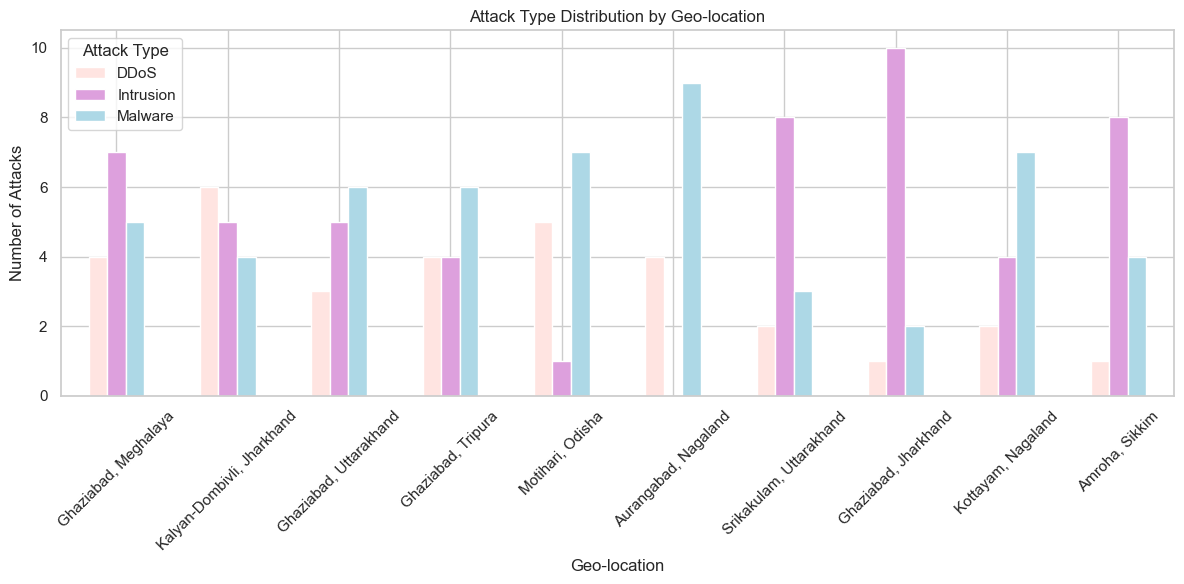

In [645]:
top_geo_sources.drop('Total Attacks', axis=1).plot(kind='bar', figsize=(12, 6), color = ['mistyrose','plum','lightblue'])
plt.title('Attack Type Distribution by Geo-location')
plt.xlabel('Geo-location')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.legend(title='Attack Type')
plt.tight_layout()
plt.show()

* Whidespread attack activity all across India.
* Significantly high amount of Intrusion attacks observed in Ghaziabad,Jharkhand.
* Malware attacks are highest in Aurangabad, Nagaland.